In [54]:
import os
os.chdir('C:/Users/user/Downloads')

In [56]:
import pandas as pd

# Load the first Excel file
Sheet1 = 'Sheet1'
excel_file1 = 'all_dates.xlsx'
df1 = pd.read_excel(excel_file1, sheet_name=Sheet1)

# Load the second Excel file
Sheet2 = 'Sheet1'
excel_file2 = 'exog_dates.xlsx'
df2 = pd.read_excel(excel_file2, sheet_name=Sheet2)

In [57]:
# Assuming df1 and df2 are your dataframes
merged_df = pd.merge(df1, df2, how='outer', on='date_column', sort=True)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select the columns you want to analyze
columns_to_check = merged_df.columns[1:]

In [59]:
# Check for missing values
missing_values = merged_df[columns_to_check].isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Price_China_5-Year_Bond    504
Price_India_5-Year_Bond    504
Price_CSI_300              504
Price_BRENT                504
Price_BSE-500              519
Price_EUR_CNY              504
Price_USD_CNY              504
Price_EUR_INR              504
Price_USD_INR              504
Price_GAS                  504
Price_GOLD                 504
dtype: int64


In [60]:
# Sort the merged dataframe by the date column
merged_df = merged_df.sort_values(by='date_column')

# Fill initial NaN values with the next non-NaN value
cols = [col for col in merged_df.columns if col != 'date_column']
merged_df[cols] = merged_df[cols].apply(lambda x: x.ffill().bfill())

In [61]:
# Check for missing values
missing_values = merged_df[columns_to_check].isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Price_China_5-Year_Bond    0
Price_India_5-Year_Bond    0
Price_CSI_300              0
Price_BRENT                0
Price_BSE-500              0
Price_EUR_CNY              0
Price_USD_CNY              0
Price_EUR_INR              0
Price_USD_INR              0
Price_GAS                  0
Price_GOLD                 0
dtype: int64


In [62]:
df1 = merged_df.copy()

In [63]:
df1

,date_column,Price_China_5-Year_Bond,Price_India_5-Year_Bond,Price_CSI_300,Price_BRENT,Price_BSE-500,Price_EUR_CNY,Price_USD_CNY,Price_EUR_INR,Price_USD_INR,Price_GAS,Price_GOLD
0,2010-01-01,2.980,7.253,3535.23,80.12,6903.629883,9.8423,6.8285,66.7295,46.295,5884.0,1118.30
1,2010-01-04,2.980,7.253,3535.23,80.12,6903.629883,9.8423,6.8285,66.7295,46.295,5884.0,1118.30
2,2010-01-05,2.950,7.211,3564.04,80.59,6974.490234,9.8091,6.8268,66.3900,46.205,5637.0,1118.70
3,2010-01-06,2.950,7.241,3541.73,81.89,6994.149902,9.8413,6.8278,65.8645,45.695,6009.0,1136.50
4,2010-01-07,2.980,7.266,3471.46,81.51,6971.419922,9.7764,6.8281,65.3525,45.650,5806.0,1133.70
...,...,...,...,...,...,...,...,...,...,...,...,...
3660,2024-01-12,2.409,7.058,3284.17,78.29,31215.689453,7.8466,7.1665,90.7200,82.857,3313.0,2061.10
3661,2024-01-15,2.418,7.023,3280.92,78.15,31440.699219,7.8509,7.1711,90.6790,82.827,3066.0,2057.85
3662,2024-01-16,2.431,7.021,3300.88,78.29,31346.189453,7.8186,7.1902,90.3460,83.084,2900.0,2039.70
3663,2024-01-17,2.408,7.039,3229.08,77.88,30808.230469,7.8300,7.1960,90.5100,83.182,2870.0,2015.90


In [65]:
# Calculate the total sample size
total_sample_size = df1.shape[0]

for col in columns_to_check:
    # Check for outliers using the IQR method
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)][col]
    num_outliers = len(outliers)
    
    # Calculate the percentage of outliers
    outlier_percentage = (num_outliers / total_sample_size) * 100
    
    print(f"Outliers in column '{col}': {num_outliers} ({outlier_percentage:.2f}% of total sample size)")
    
    # Check if the number of outliers is acceptable
    if outlier_percentage < 10:
        print("The number of outliers is acceptable.")
    else:
        print("The number of outliers may be too high and requires further investigation.")

Outliers in column 'Price_China_5-Year_Bond': 1 (0.03% of total sample size)
The number of outliers is acceptable.
Outliers in column 'Price_India_5-Year_Bond': 0 (0.00% of total sample size)
The number of outliers is acceptable.
Outliers in column 'Price_CSI_300': 8 (0.22% of total sample size)
The number of outliers is acceptable.
Outliers in column 'Price_BRENT': 0 (0.00% of total sample size)
The number of outliers is acceptable.
Outliers in column 'Price_BSE-500': 67 (1.83% of total sample size)
The number of outliers is acceptable.
Outliers in column 'Price_EUR_CNY': 125 (3.41% of total sample size)
The number of outliers is acceptable.
Outliers in column 'Price_USD_CNY': 0 (0.00% of total sample size)
The number of outliers is acceptable.
Outliers in column 'Price_EUR_INR': 0 (0.00% of total sample size)
The number of outliers is acceptable.
Outliers in column 'Price_USD_INR': 0 (0.00% of total sample size)
The number of outliers is acceptable.
Outliers in column 'Price_GAS': 15

In [66]:
# Check data types of the columns
print(df1.dtypes)

date_column                datetime64[ns]
Price_China_5-Year_Bond           float64
Price_India_5-Year_Bond           float64
Price_CSI_300                     float64
Price_BRENT                       float64
Price_BSE-500                     float64
Price_EUR_CNY                     float64
Price_USD_CNY                     float64
Price_EUR_INR                     float64
Price_USD_INR                     float64
Price_GAS                         float64
Price_GOLD                        float64
dtype: object


In [ ]:
# Convert multiple columns to float64
float_cols = ['Цена_GAS']
df1[float_cols] = df1[float_cols].astype('float64')

In [ ]:
# Check data types of the columns
print(df1.dtypes)

In [ ]:
import matplotlib.pyplot as plt

for col in columns_to_check:
    # Plot a histogram to visualize the distribution
    plt.figure()
    df1[col].hist()
    plt.title(f"Distribution of values in column '{col}'")
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select the exogenous variables columns
exog_columns = df1.columns[1:]

In [ ]:
import pandas as pd

# Create a summary DataFrame
cds_stats = df1[exog_columns].describe().T

# Convert the DataFrame to a HTML table
html_table = cds_stats.to_html(classes='table table-striped')

# Display the HTML table
from IPython.display import display, HTML
display(HTML(html_table))

In [ ]:
import pandas as pd

# Create a summary DataFrame
cds_stats = df1[exog_columns].describe().T

# Export the DataFrame to an Excel file
cds_stats.to_excel('exog_stats.xlsx', index=True)

In [ ]:
from IPython.display import display
display(cds_stats)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Select the exog columns
cds_columns = df1.columns[1:]

# Create the Plotly line plot
fig = go.Figure()
for col in cds_columns:
    fig.add_trace(go.Scatter(x=df1.index, y=df1[col], mode='lines', name=col))

fig.update_layout(
    title='CDS Spread Trends Over Time',
    xaxis_title='Time',
    yaxis_title='CDS Spread',
    legend_title='CDS Spread Columns',
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)

fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Select the exog columns
cds_columns = df1.columns[1:]

# Create the Plotly histograms
fig = go.Figure()
for col in cds_columns:
    fig.add_trace(go.Histogram(x=df1[col], nbinsx=20, histnorm='probability density', name=col))

fig.update_layout(
    title='Distribution of CDS Spreads',
    xaxis_title='CDS Spread',
    yaxis_title='Probability Density',
    bargap=0.1,
    bargroupgap=0.1,
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)

fig.show()

In [ ]:
import pandas as pd
from arch.unitroot import ADF, KPSS, PhillipsPerron, DFGLS, ZivotAndrews

# Select the CDS spread columns (columns 3 to 26)
cds_columns = df1.columns[1:]

# Perform stationarity tests on each CDS spread column
for col in cds_columns:
    cds_spread = df1[col]

    # Augmented Dickey-Fuller (ADF) test
    adf = ADF(cds_spread)
    print(f"Augmented Dickey-Fuller (ADF) test for '{col}':") 
    print(adf.summary().as_text())
    print()

    # Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
    kpss = KPSS(cds_spread)
    print(f"Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for '{col}':") 
    print(kpss.summary().as_text())
    print()

    # Phillips-Perron (PP) test
    pp = PhillipsPerron(cds_spread)
    print(f"Phillips-Perron (PP) test for '{col}':") 
    print(pp.summary().as_text())
    print()

    # Dickey-Fuller-GLS (DFGLS) test
    dfgls = DFGLS(cds_spread)
    print(f"Dickey-Fuller-GLS (DFGLS) test for '{col}':") 
    print(dfgls.summary().as_text())
    print()

    # Zivot-Andrews test
    za = ZivotAndrews(cds_spread)
    print(f"Zivot-Andrews test for '{col}':") 
    print(za.summary().as_text())
    print()

In [67]:
# Unit Root Tests - start cell

import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

In [28]:
# Run if corrected_series_exog.xlsx is already created

# Load the Excel file
Sheet1 = 'Sheet1'
excel_file1 = 'corrected_series_exog.xlsx'
df1 = pd.read_excel(excel_file1, sheet_name=Sheet1)

# Convert columns to float64
float_cols = ['Цена_GAS']
df1[float_cols] = df1[float_cols].astype('float64')

In [70]:
# Select the CDS spread columns (columns 3 to 26)
cds_columns = df1.columns[1:]

In [71]:
start_dates = {}
end_dates = {}
unchanged_series = []
unchanged_threshold = 30

In [72]:
for col in cds_columns:
    cds_spread = df1[col]

    # Find the start date
    for i, value in enumerate(cds_spread):
        if value != 0:
            start_dates[col] = cds_spread.index[i]
            break

    # Check if the last `unchanged_threshold` values are the same
    last_values = cds_spread.iloc[-unchanged_threshold:]
    if len(set(last_values)) == 1:
        unchanged_series.append(col)

        # Find the end date (index when the series took the last unique value)
        last_unique_value = cds_spread.iloc[-1]
        for i in range(len(cds_spread) - 1, -1, -1):
            if cds_spread.iloc[i] != last_unique_value:
                end_dates[col] = cds_spread.index[i + 1]
                break
        else:
            end_dates[col] = cds_spread.index[0]


In [73]:
unchanged_series

[]

In [74]:
print("Time series that did not change in the last", unchanged_threshold, "periods:")
for series in unchanged_series:
    print(f"{series}: Start date - {start_dates[series]}, End date - {end_dates[series]}")

Time series that did not change in the last 30 periods:


In [75]:
start_dates

{'Price_China_5-Year_Bond': 0,
 'Price_India_5-Year_Bond': 0,
 'Price_CSI_300': 0,
 'Price_BRENT': 0,
 'Price_BSE-500': 0,
 'Price_EUR_CNY': 0,
 'Price_USD_CNY': 0,
 'Price_EUR_INR': 0,
 'Price_USD_INR': 0,
 'Price_GAS': 0,
 'Price_GOLD': 0}

In [76]:
end_dates

{}

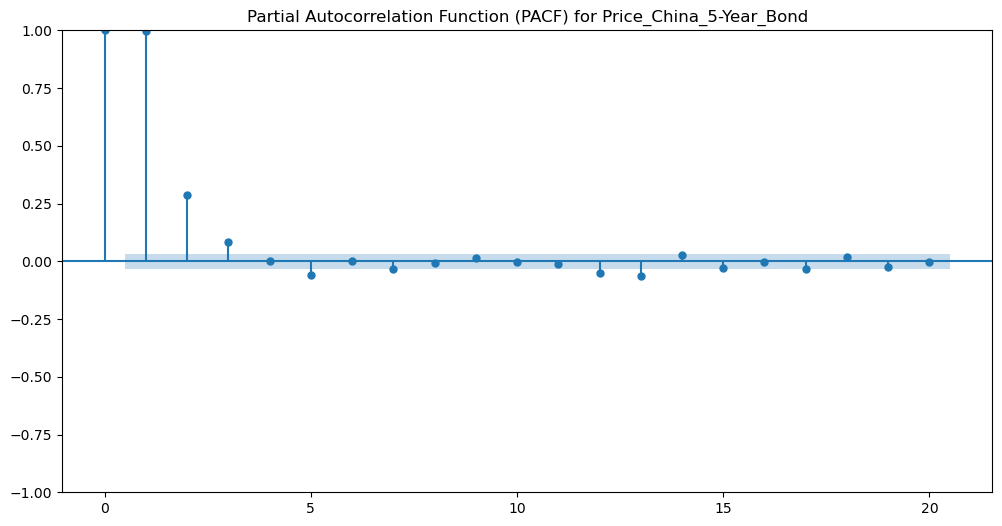

Enter the chosen lag value for Price_China_5-Year_Bond: 4


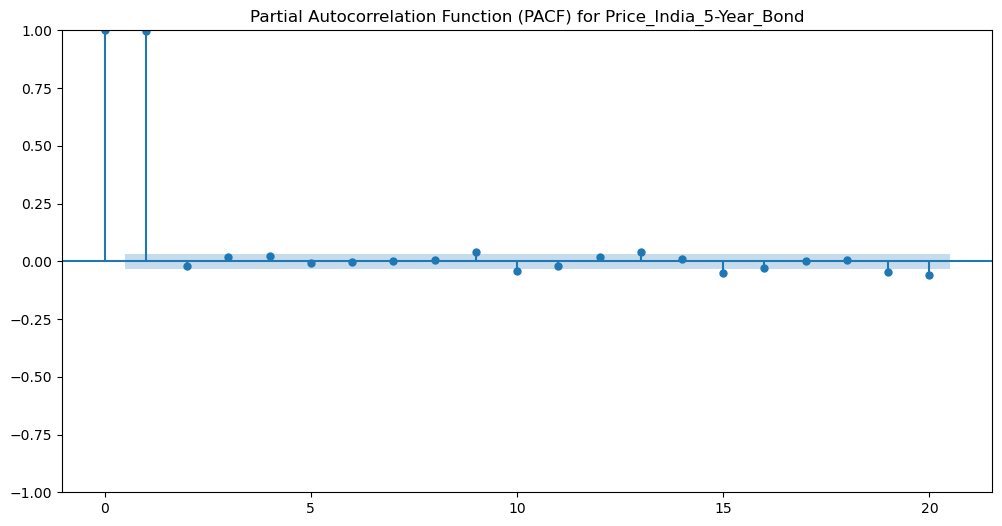

Enter the chosen lag value for Price_India_5-Year_Bond: 2


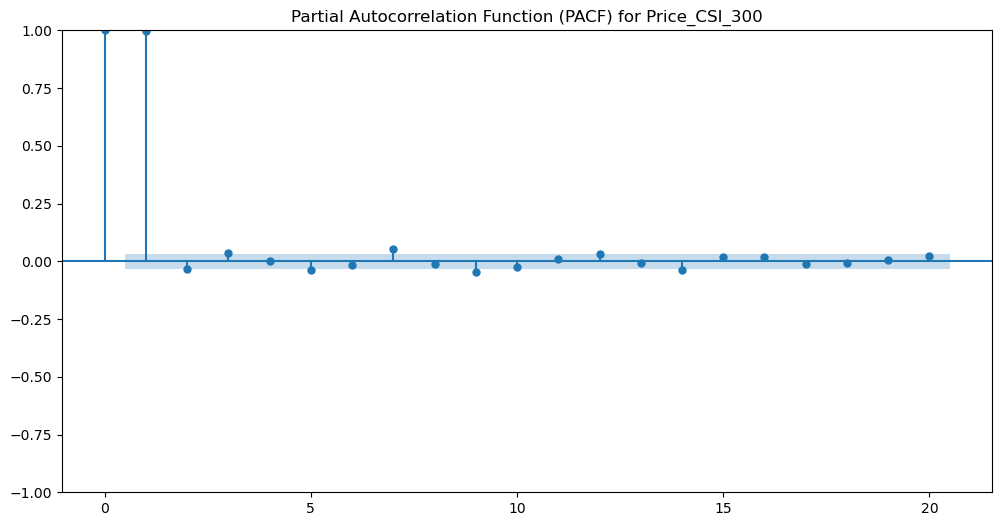

Enter the chosen lag value for Price_CSI_300: 4


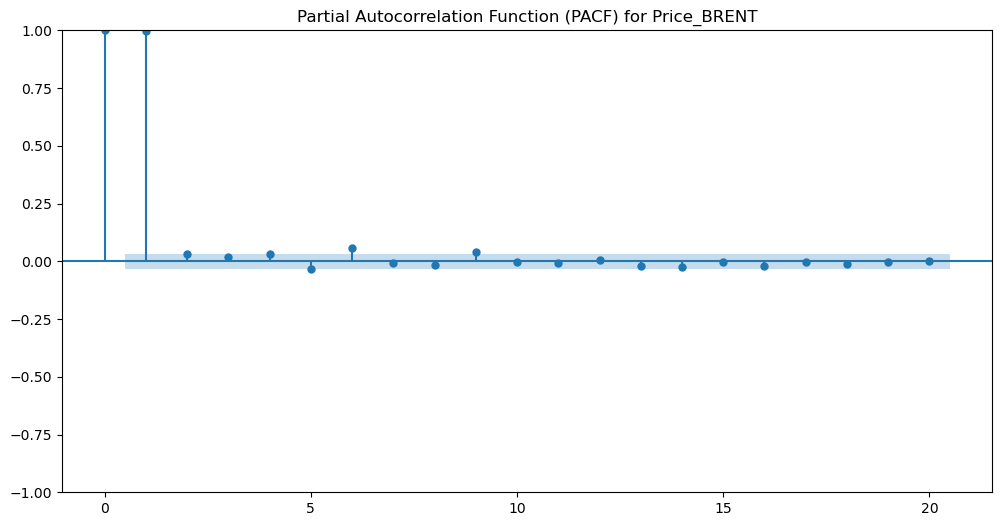

Enter the chosen lag value for Price_BRENT: 2


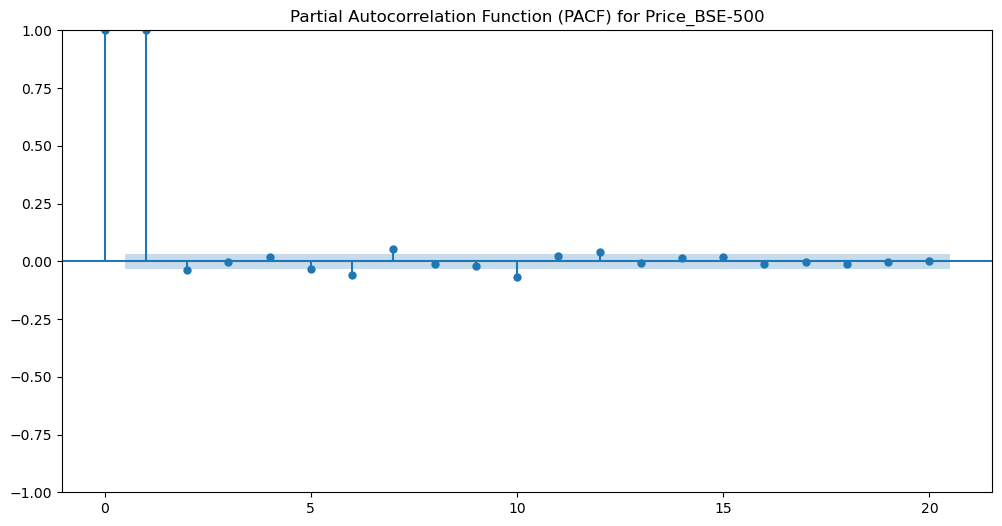

Enter the chosen lag value for Price_BSE-500: 3


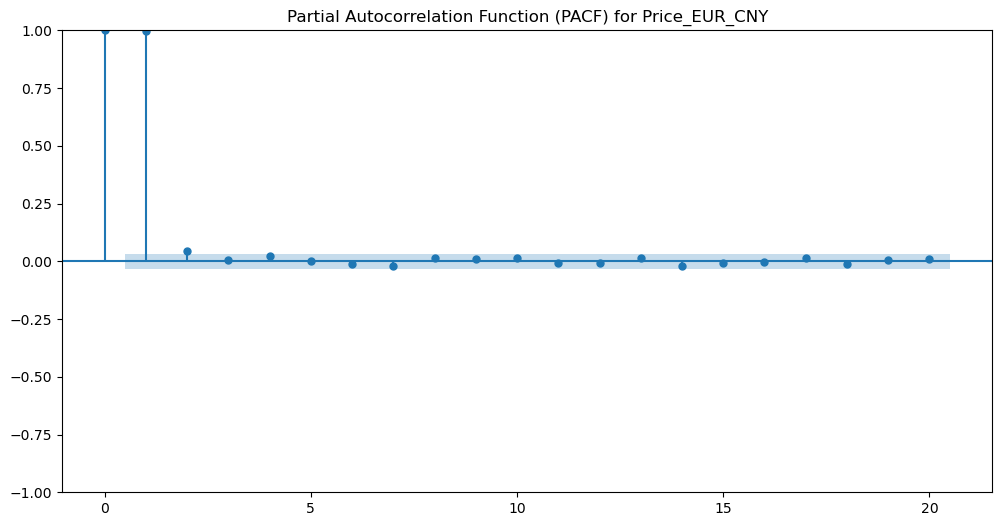

Enter the chosen lag value for Price_EUR_CNY: 3


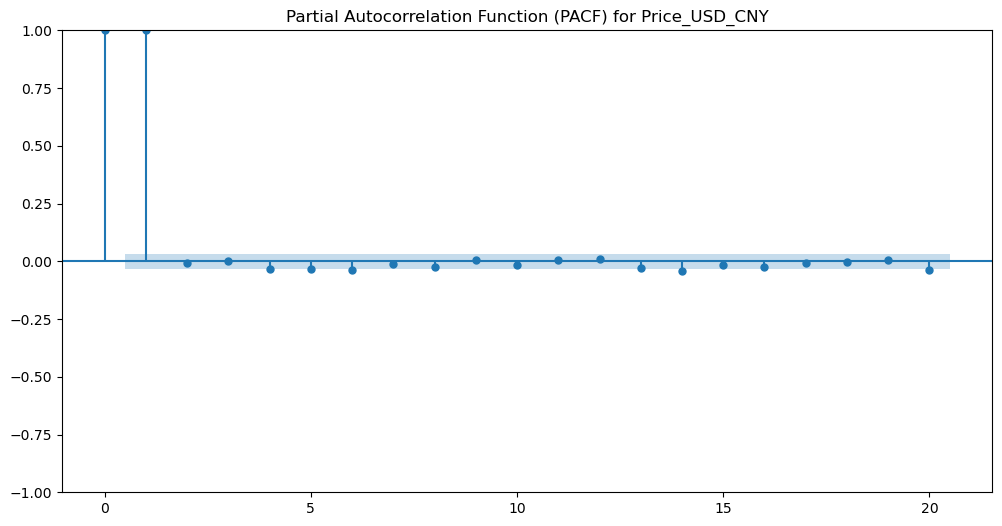

Enter the chosen lag value for Price_USD_CNY: 2


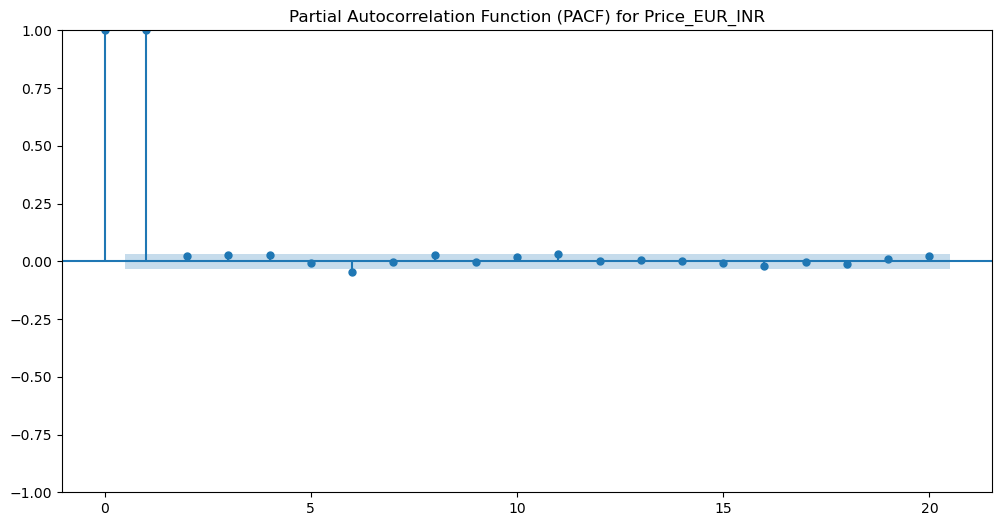

Enter the chosen lag value for Price_EUR_INR: 2


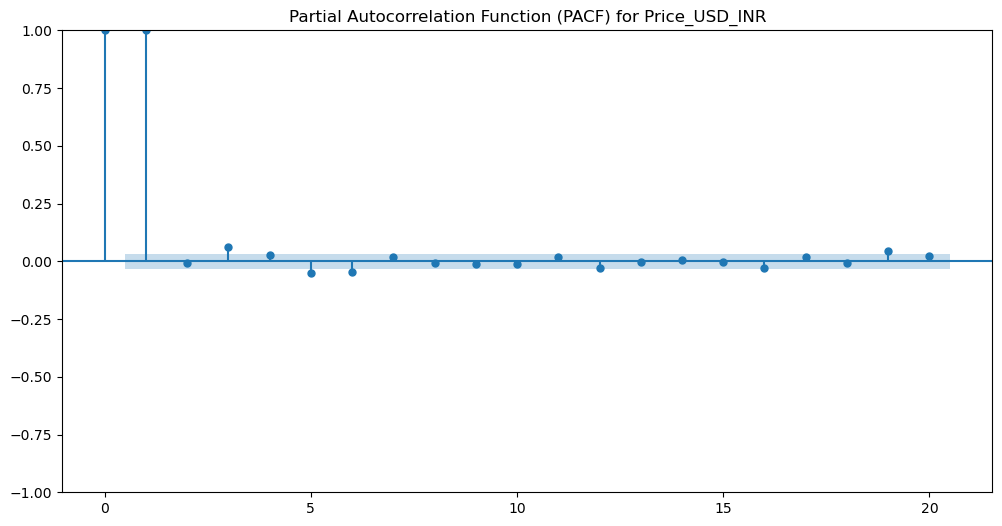

Enter the chosen lag value for Price_USD_INR: 4


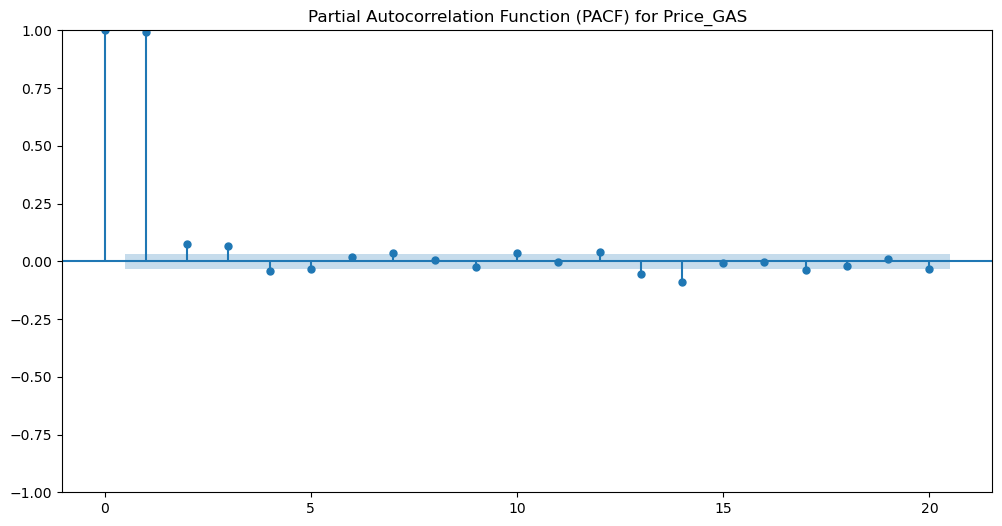

Enter the chosen lag value for Price_GAS: 5


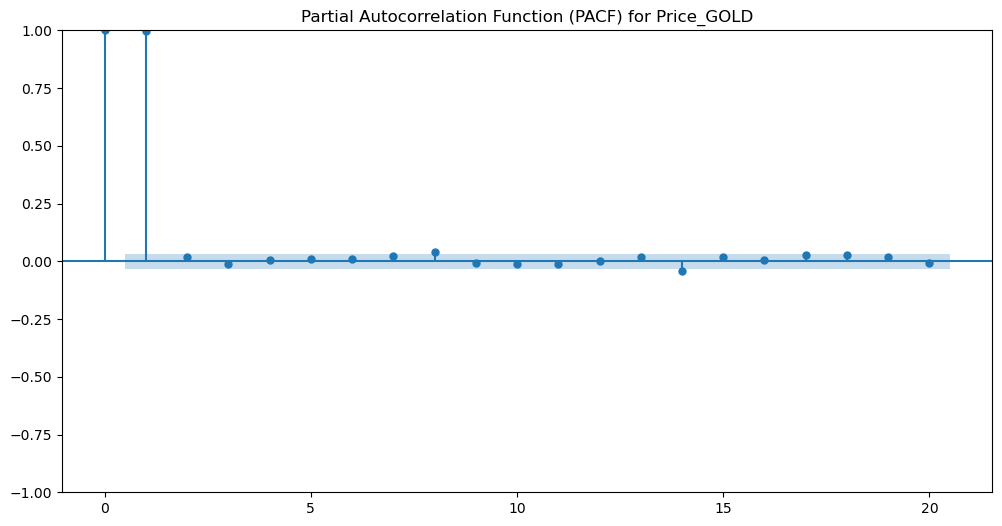

Enter the chosen lag value for Price_GOLD: 2


In [77]:
chosen_lags = {}

for col in cds_columns:
    cds_spread = df1[col][start_dates[col]:]
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_pacf(cds_spread, ax=ax, lags=20, method = "ols-adjusted")  # Change lags as needed
    ax.set_title(f"Partial Autocorrelation Function (PACF) for {col}")
    plt.show()
    
    #Choose the appropriate lag for the current column
    lag_value = int(input(f"Enter the chosen lag value for {col}: "))
    chosen_lags[col] = lag_value

In [88]:
# Чтобы не мучиться

chosen_lags = {'Price_China_5-Year_Bond': 4, 'Price_India_5-Year_Bond': 2, 'Price_CSI_300': 4, 'Price_BRENT': 2, 'Price_BSE-500': 3, 'Price_EUR_CNY': 3, 'Price_USD_CNY': 2, 'Price_EUR_INR': 2, 'Price_USD_INR': 4, 'Price_GAS': 5, 'Price_GOLD': 2}

In [81]:
import pandas as pd
from arch.unitroot import KPSS

# Perform KPSS test for each CDS spread column
stationary_count = 0
total_columns = len(cds_columns)

# Create an empty dictionary to store the corrected series
corrected_series = {}

for col in cds_columns:
    if col in unchanged_series:
        # Use the start and end dates for series that stopped changing
        cds_spread = df1[col][start_dates[col]:end_dates[col]]
    else:
        # Use the entire series for series that did not stop changing
        cds_spread = df1[col][start_dates[col]:]
    # Store the corrected series in the dictionary
    corrected_series[col] = cds_spread
    lag_value = chosen_lags[col]
    kpss = KPSS(cds_spread, lags = lag_value)
    print(kpss.lags)
    print(f"Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for '{col}':") 
    print(kpss.summary().as_text())
    if kpss.pvalue > 0.05:
        stationary_count += 1
    
stationary_percentage = (stationary_count / total_columns) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"Percentage of stationary CDS spread columns: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary CDS spread columns: {non_stationary_percentage:.2f}%")

4
Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'Price_China_5-Year_Bond':
    KPSS Stationarity Test Results   
Test Statistic                 21.279
P-value                         0.000
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
2
Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'Price_India_5-Year_Bond':
    KPSS Stationarity Test Results   
Test Statistic                 67.400
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
4
Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'Price_CSI_300':
    KPSS Stationarity Test Results   
Tes

In [82]:
corrected_series

{'Price_China_5-Year_Bond': 0       2.980
 1       2.980
 2       2.950
 3       2.950
 4       2.980
         ...  
 3660    2.409
 3661    2.418
 3662    2.431
 3663    2.408
 3664    2.405
 Name: Price_China_5-Year_Bond, Length: 3665, dtype: float64,
 'Price_India_5-Year_Bond': 0       7.253
 1       7.253
 2       7.211
 3       7.241
 4       7.266
         ...  
 3660    7.058
 3661    7.023
 3662    7.021
 3663    7.039
 3664    7.050
 Name: Price_India_5-Year_Bond, Length: 3665, dtype: float64,
 'Price_CSI_300': 0       3535.23
 1       3535.23
 2       3564.04
 3       3541.73
 4       3471.46
          ...   
 3660    3284.17
 3661    3280.92
 3662    3300.88
 3663    3229.08
 3664    3274.73
 Name: Price_CSI_300, Length: 3665, dtype: float64,
 'Price_BRENT': 0       80.12
 1       80.12
 2       80.59
 3       81.89
 4       81.51
         ...  
 3660    78.29
 3661    78.15
 3662    78.29
 3663    77.88
 3664    79.10
 Name: Price_BRENT, Length: 3665, dtype: float64,
 'Pric

In [83]:
# Create a new DataFrame from the corrected series dictionary
corrected_df = pd.DataFrame(corrected_series)

# Export the corrected DataFrame to an Excel file
corrected_df.to_excel('corrected_series_exog.xlsx', index=True)

In [84]:
# Вручную подобранные лаги

from arch.unitroot import ADF

stationary_count = 0
total_columns = len(cds_columns)

for col in cds_columns:
    if col in unchanged_series:
        # Use the start and end dates for series that stopped changing
        cds_spread = df1[col][start_dates[col]:end_dates[col]]
    else:
        # Use the entire series for series that did not stop changing
        cds_spread = df1[col][start_dates[col]:]

    lag_value = chosen_lags[col]
    adf = ADF(cds_spread, lags=lag_value)
    print(f"Augmented Dickey-Fuller (ADF) test for '{col}':") 
    print(adf.summary().as_text())
    if adf.pvalue <= 0.05:
        stationary_count += 1

stationary_percentage = (stationary_count / total_columns) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"Percentage of stationary CDS spread columns: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary CDS spread columns: {non_stationary_percentage:.2f}%")

Augmented Dickey-Fuller (ADF) test for 'Price_China_5-Year_Bond':
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.864
P-value                         0.349
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Augmented Dickey-Fuller (ADF) test for 'Price_India_5-Year_Bond':
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.515
P-value                         0.526
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Augmented Dickey-Fuller (ADF) test for 'Price_CSI_300':
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.83

In [89]:
import pandas as pd
from arch.unitroot import PhillipsPerron

# Perform KPSS test for each CDS spread column
stationary_count = 0
total_columns = len(cds_columns)

for col in cds_columns:
    if col in unchanged_series:
        # Use the start and end dates for series that stopped changing
        cds_spread = df1[col][start_dates[col]:end_dates[col]]
    else:
        # Use the entire series for series that did not stop changing
        cds_spread = df1[col][start_dates[col]:]
    lag_value = chosen_lags[col]
    pp = PhillipsPerron(cds_spread, lags=lag_value)
    print(f"Phillips-Perron (PP) test for '{col}':") 
    print(pp.summary().as_text())
    if pp.pvalue <= 0.05:
        stationary_count += 1
    
stationary_percentage = (stationary_count / total_columns) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"Percentage of stationary CDS spread columns: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary CDS spread columns: {non_stationary_percentage:.2f}%")

Phillips-Perron (PP) test for 'Price_China_5-Year_Bond':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.005
P-value                         0.284
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Phillips-Perron (PP) test for 'Price_India_5-Year_Bond':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.527
P-value                         0.520
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Phillips-Perron (PP) test for 'Price_CSI_300':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.799
P-value                  

In [90]:
import pandas as pd
from arch.unitroot import ZivotAndrews

# Perform ZivotAndrews test for each CDS spread column
stationary_count = 0
total_columns = len(cds_columns)

for col in cds_columns:
    if col in unchanged_series:
        # Use the start and end dates for series that stopped changing
        cds_spread = df1[col][start_dates[col]:end_dates[col]]
    else:
        # Use the entire series for series that did not stop changing
        cds_spread = df1[col][start_dates[col]:]
    lag_value = chosen_lags[col]
    za = ZivotAndrews(cds_spread, lags=lag_value)
    print(f"Zivot-Andrews test for '{col}':") 
    print(za.summary().as_text())
    if za.pvalue <= 0.05:
        stationary_count += 1
    
stationary_percentage = (stationary_count / total_columns) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"Percentage of stationary CDS spread columns: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary CDS spread columns: {non_stationary_percentage:.2f}%")

Zivot-Andrews test for 'Price_China_5-Year_Bond':
        Zivot-Andrews Results        
Test Statistic                 -3.111
P-value                         0.875
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.
Zivot-Andrews test for 'Price_India_5-Year_Bond':
        Zivot-Andrews Results        
Test Statistic                 -3.410
P-value                         0.735
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.
Zivot-Andrews test for 'Price_CSI_300':
        Zivot-Andrews Results        
Test